In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)
img_mean = np.mean(img)

In [3]:
# ---- 2D DCT ----
img_dct = cv2.dct(img)

In [4]:

# ---- High-pass filter for multiple cutoff frequencies ----
fc_list = [256, 128, 64, 32, 16, 8, 4, 2]
h, w = img.shape

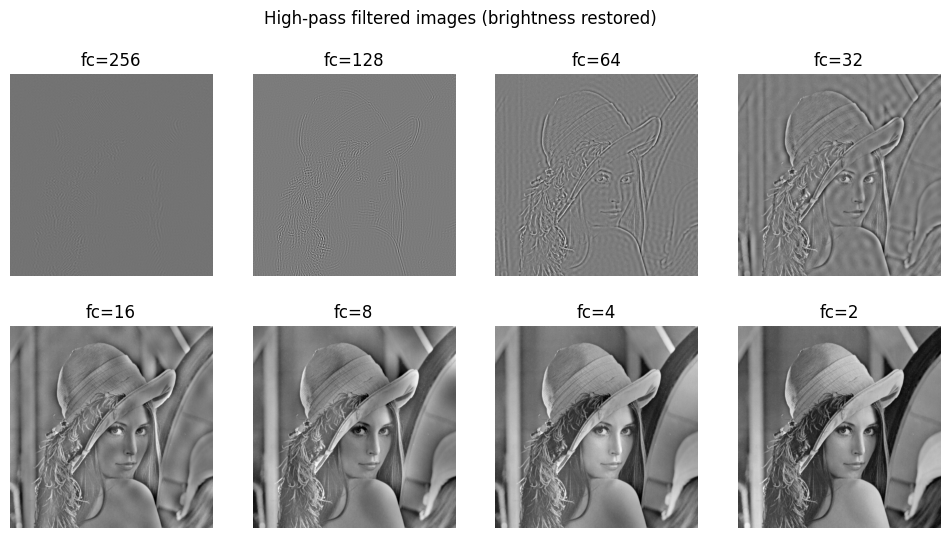

In [5]:
plt.figure(figsize=(12, 6))
for i, fc in enumerate(fc_list):
    img_dct_hp = img_dct.copy()
    
    # Zero out low-frequency components (upper-left fc x fc block)
    img_dct_hp[:fc, :fc] = 0
    
    # Inverse DCT
    img_hp = cv2.idct(img_dct_hp)
    
    # Add original mean to restore brightness
    img_hp += img_mean
    
    # Display
    plt.subplot(2, 4, i+1)
    plt.imshow(np.clip(img_hp, 0, 255).astype(np.uint8), cmap='gray')
    plt.title(f'fc={fc}')
    plt.axis('off')

plt.suptitle("High-pass filtered images (brightness restored)")
plt.show()

Text(0.5, 1.0, 'Original Image')

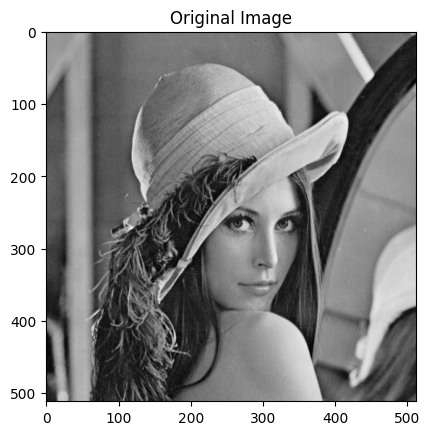

In [7]:
plt.imshow(img, cmap='gray')
plt.title("Original Image")